In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
pip install -U seaborn

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pwd

/c/Users/Admin/Desktop/Python_DA/Notebooks


In [4]:
!ls /c/Users/Admin/Desktop/Python_DA/Data/Pratice/

amazon.csv
data.csv
netflix_titles.csv
supermarket_sales.csv


In [5]:
df = pd.read_csv("../Data/Pratice/supermarket_sales.csv")
df.rename(columns = {"cogs":"COGS"}, inplace = True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Check data xem có bị null không

In [6]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
COGS                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
COGS                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.groupby("Gender")["Product line"].size()

Gender
Female    501
Male      499
Name: Product line, dtype: int64

### Chúng ta sẽ lọc ra các sản phẩn theo giới tính của khách hàng khi mua hàng tại siêu thị

In [9]:
sortdf = df.groupby("Gender")["Product line"].value_counts(sort = False)
sortdf

Gender  Product line          
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64

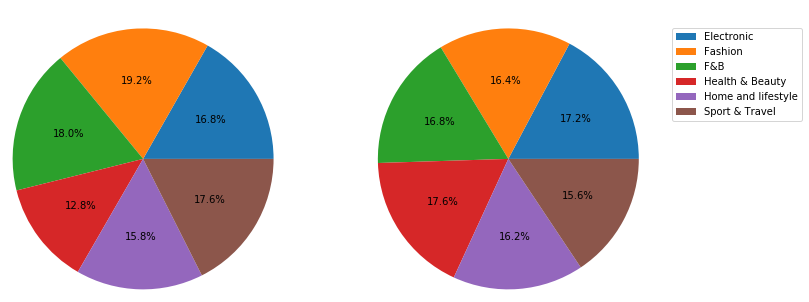

In [10]:
labels = ["Electronic","Fashion","F&B","Health & Beauty","Home and lifestyle","Sport & Travel"]
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.pie(sortdf.iloc[0:6], labels = None, radius = 1.2,autopct ='%1.1f%%' )    # sortdf.iloc[0:6].plot.pie(ax=ax, labels = labels)
ax1.set_title("Female", fontweight = "bold", color = "w")

ax2.pie(sortdf.iloc[6:], labels = None, radius = 1.2,autopct ='%1.1f%%' )
ax2.set_title("Male", fontweight = "bold", color = "w")

plt.legend(labels = labels, bbox_to_anchor=(1.6, 1))
plt.show()

### => Qua biểu đồ này, ta thấy được rằng khi đi siêu thị, các quý cô thường mua các sản phẩm liên quan tới thời trang và đồ ăn thức uống là chủ yếu (19.2% và 18%)
### => Đối với quý ông, họ thường đi siêu thị để mua các sản phẩm về Sức khỏe và điện máy. Ngoài ra ta có thể thấy được nhu cầu của các quý ông dường như cân bằng hơn so với phái nữ

In [11]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### Ở đây sự chênh lệch về Member và khách vãng lai là không nhiều nên ta không phân tích sâu hơn ở khía cạnh này

In [12]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
df["Date"] + " " + df["Time"]

0       1/5/2019 13:08
1       3/8/2019 10:29
2       3/3/2019 13:23
3      1/27/2019 20:33
4       2/8/2019 10:37
            ...       
995    1/29/2019 13:46
996     3/2/2019 17:16
997     2/9/2019 13:22
998    2/22/2019 15:33
999    2/18/2019 13:28
Length: 1000, dtype: object

In [14]:
df["Date"] = pd.to_datetime(df["Date"]+ " " + df["Time"])

In [15]:
df = df.drop(columns = "Time").copy()

In [16]:
df.rename(columns = {"Date":"Datetime"}, inplace = True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Datetime,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Buytime per City

In [17]:
df["Datetime"].dt.hour.value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: Datetime, dtype: int64

In [18]:
buytime = df["Datetime"].dt.hour.value_counts().reset_index().sort_values("index") #df["Datetime"].value_counts()
buytime

,index,Datetime
3,10,101
5,11,90
6,12,89
1,13,103
7,14,83
2,15,102
8,16,77
10,17,74
4,18,93
0,19,113


In [20]:
branch = df[["Branch","Datetime","City"]]
branch.head()

,Branch,Datetime,City
0,A,2019-01-05 13:08:00,Yangon
1,C,2019-03-08 10:29:00,Naypyitaw
2,A,2019-03-03 13:23:00,Yangon
3,A,2019-01-27 20:33:00,Yangon
4,A,2019-02-08 10:37:00,Yangon


In [21]:
# Chúng ta check xem các value có bằng nhau hay không để nhập series vào dataframe
print(branch.shape[0])
branch["Datetime"].dt.hour.count

1000


<bound method Series.count of 0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Datetime, Length: 1000, dtype: int64>

In [22]:
branch = branch.assign(Hour = branch["Datetime"].dt.hour.values).copy()
branch.drop(columns="Datetime", inplace = True)
branch.head()

,Branch,City,Hour
0,A,Yangon,13
1,C,Naypyitaw,10
2,A,Yangon,13
3,A,Yangon,20
4,A,Yangon,10


In [23]:
branch.groupby(["Branch","Hour"])["City"].count().reset_index()

,Branch,Hour,City
0,A,10,38
1,A,11,35
2,A,12,33
3,A,13,31
4,A,14,25
5,A,15,37
6,A,16,32
7,A,17,27
8,A,18,33
9,A,19,27


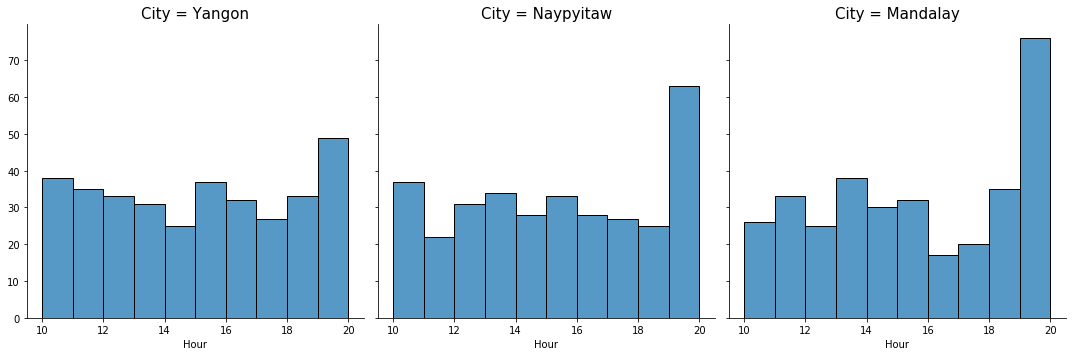

In [81]:
g = sns.FacetGrid(branch, col = "City", height = 5 )
g.map(sns.histplot, "Hour" )
g.set_titles(size = 15)
plt.show()

#### Thông qua biểu đồ này ta có thể rút ra những điều sau:
- Các khách hàng chủ yếu đi siêu thị vào khung giờ 18 - 20h
- Đối với Yangon City, phải xem lại xem có phải do siêu thị phục vụ chưa tốt hay chưa có các chương trình tốt để giữ chân khách hàng nên lượng khách hàng thời điểm 18-20h ít hơn rất nhiều so với 2 chi nhánh còn lại
- Đối với Mandalay City, siêu thị cần phải cải thiện khung giờ từ 16 - 18h do lượng khách hàng trung bình tại khung giờ này khá thấp

### Product per City

In [120]:
product = df.groupby(["City","Product line"])["Branch"].count().reset_index().copy()
product 

,City,Product line,Branch
0,Mandalay,Electronic accessories,55
1,Mandalay,Fashion accessories,62
2,Mandalay,Food and beverages,50
3,Mandalay,Health and beauty,53
4,Mandalay,Home and lifestyle,50
5,Mandalay,Sports and travel,62
6,Naypyitaw,Electronic accessories,55
7,Naypyitaw,Fashion accessories,65
8,Naypyitaw,Food and beverages,66
9,Naypyitaw,Health and beauty,52


In [121]:
# g = sns.FacetGrid(product, col = "City", height = 5 )
# g.map(sns.barplot, x= "Product line", y = "Branch" )
# g.set_titles(size = 15)
# plt.show()

In [122]:
product

,City,Product line,Branch
0,Mandalay,Electronic accessories,55
1,Mandalay,Fashion accessories,62
2,Mandalay,Food and beverages,50
3,Mandalay,Health and beauty,53
4,Mandalay,Home and lifestyle,50
5,Mandalay,Sports and travel,62
6,Naypyitaw,Electronic accessories,55
7,Naypyitaw,Fashion accessories,65
8,Naypyitaw,Food and beverages,66
9,Naypyitaw,Health and beauty,52


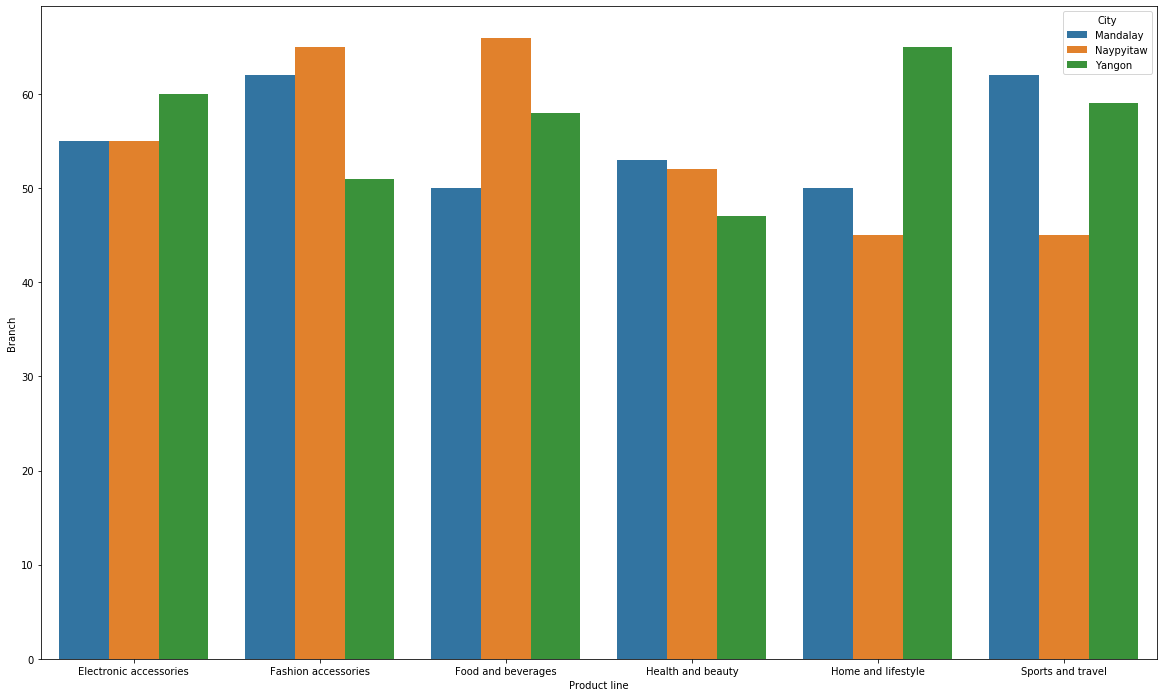

In [129]:
fig, ax = plt.subplots(figsize = (20,12))
sns.barplot(
    x = "Product line",
    y = "Branch",
    hue = "City",
    data = product
)

plt.show()